In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#part1 = pd.read_csv("partition_1.csv", sep=";")
#part2 = pd.read_csv("partition_2.csv", sep=";")

In [3]:
#part2.columns = part1.columns

In [4]:
#part1 = part1.drop(part1.columns[:2], axis=1)

In [5]:
#part1.columns

In [6]:
#part2.columns

In [7]:
#part2 = part2.drop(part2.columns[:2], axis=1)

In [8]:
#result = pd.concat([part1, part2], join='inner')

In [9]:
#result.to_csv("fused_music_data.csv", sep=";")

In [10]:
#f =

In [11]:
#music_df= pd.read_csv("fused_music_data.csv", sep=";")

In [12]:
total_rows = 14857639
rows_to_skip = total_rows - 5000000

In [13]:
partial_fused_music_df = pd.read_csv("fused_music_data.csv", skiprows=range(1, rows_to_skip + 1), sep=";")

/tmp/ipykernel_182587/3685375908.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  partial_fused_music_df = pd.read_csv("fused_music_data.csv", skiprows=range(1, rows_to_skip + 1), sep=";")


In [14]:
partial_fused_music_df['date'] = pd.to_datetime(partial_fused_music_df['date'])

In [15]:
top_10000_streamed_songs = partial_fused_music_df.sort_values(by='streams', ascending=False).head(10000)
global_df = partial_fused_music_df[partial_fused_music_df['region'] == 'Global']


In [16]:
top_10000_streamed_songs.head

<bound method NDFrame.head of           Unnamed: 0                                       title  rank  \
13142456    12181531                                  Easy On Me     1   
7992275      7031350             All I Want for Christmas Is You     1   
7992276      7031351                              Last Christmas     2   
6830408      5869483                             drivers license     1   
6707191      5746266                             drivers license     1   
...              ...                                         ...   ...   
13381236    12420311                                     Silence     8   
1664873       703948  Swalla (feat. Nicki Minaj & Ty Dolla $ign)    10   
1138123       177198                              Break My Heart    14   
11668913    10707988                           Happier Than Ever    18   
15394527    14433602                                       IDGAF     5   

               date              artist  region   chart          trend  \
1314245

/home/stef/miniconda3/envs/4A_IABD2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


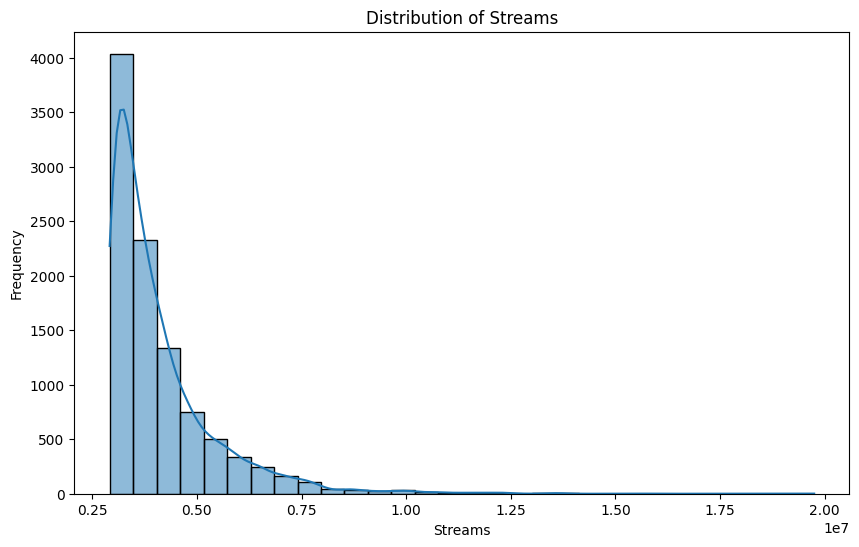

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(top_10000_streamed_songs['streams'], bins=30, kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

In [18]:
numeric_columns = partial_fused_music_df.select_dtypes(include=['number'])


In [19]:
shortest_song = partial_fused_music_df.loc[partial_fused_music_df['duration_ms'].idxmin()]
longest_song = partial_fused_music_df.loc[partial_fused_music_df['duration_ms'].idxmax()]


In [20]:
shortest_song

Unnamed: 0                         9867508
title                              DIP DIP
rank                                     7
date                   2020-04-12 00:00:00
artist                      Dree Low, Owen
region                              Sweden
chart                               top200
trend                              MOVE_UP
streams                           110991.0
album                                  NaN
popularity                             0.0
duration_ms                            0.0
explicit                              True
release_date                          0000
af_danceability                      0.815
af_energy                            0.683
af_key                                 6.0
af_loudness                         -7.154
af_mode                                0.0
af_speechiness                       0.215
af_acousticness                      0.203
af_instrumentalness               0.000005
af_liveness                           0.11
af_valence 

In [21]:
longest_song

Unnamed: 0                         10458495
title                  Año Nuevo Colan 2017
rank                                      2
date                    2017-01-02 00:00:00
artist                    DJ Krlos Berrospi
region                                 Peru
chart                               viral50
trend                             NEW_ENTRY
streams                                 NaN
album                  Año Nuevo Colan 2017
popularity                              0.0
duration_ms                       9318296.0
explicit                              False
release_date                     2016-12-21
af_danceability                       0.517
af_energy                             0.922
af_key                                 11.0
af_loudness                          -4.407
af_mode                                 0.0
af_speechiness                        0.112
af_acousticness                      0.0422
af_instrumentalness                     0.0
af_liveness                     

In [22]:
unique_titles_df = partial_fused_music_df.drop_duplicates(subset='title')

# Convert the 'duration_ms' column to seconds
unique_titles_df['duration_s'] = unique_titles_df['duration_ms'] / 1000

/tmp/ipykernel_182587/1125153591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_titles_df['duration_s'] = unique_titles_df['duration_ms'] / 1000


In [23]:
# # Create the scatter plot
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='rank', y='duration_s', data=unique_titles_df)
# plt.title('Song Length in Relation to Rank (Unique Titles)')
# plt.xlabel('Rank')
# plt.ylabel('Duration (seconds)')
# plt.show()

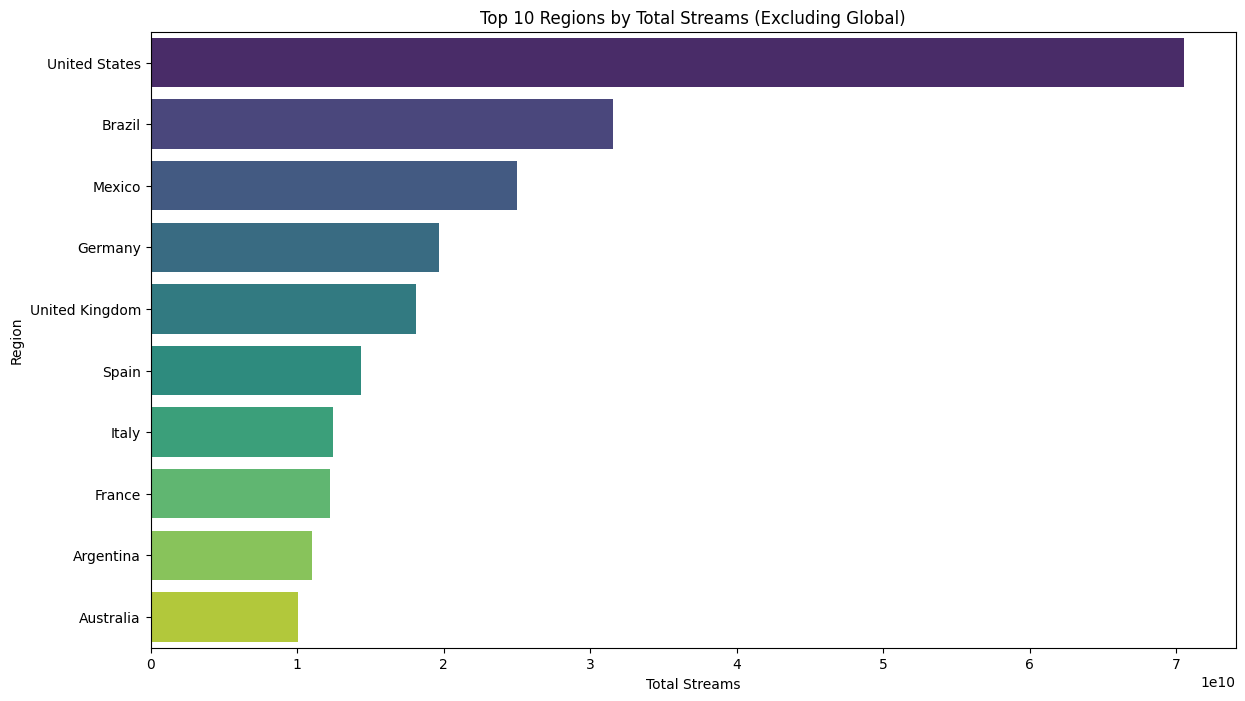

In [25]:
region_streams = partial_fused_music_df[partial_fused_music_df['region'] != 'Global']
region_streams = region_streams.groupby('region')['streams'].sum().reset_index()

# Sort the regions by the total streams and select the top 10
top_10_region_streams = region_streams.sort_values(by='streams', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='streams', y='region', data=top_10_region_streams, palette='viridis')
plt.title('Top 10 Regions by Total Streams (Excluding Global)')
plt.xlabel('Total Streams')
plt.ylabel('Region')
plt.show()